In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv(r"C:\Users\USER\Downloads\Loan_Data.csv")
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
373,LP002205,Male,No,1,Graduate,No,3062,1987.0,111.0,180.0,0.0,Urban,N
221,LP001743,Male,Yes,2,Graduate,No,4009,1717.0,116.0,360.0,1.0,Semiurban,Y
327,LP002082,Male,Yes,0,Graduate,Yes,5818,2160.0,184.0,360.0,1.0,Semiurban,Y
349,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y


In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [25]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [27]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [28]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df.shape

(614, 13)

In [30]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [34]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [35]:
categorical = [var for var in df.columns if df[var].dtype == 'object']
print(f"There are {len(categorical)} categorical variables")
print(categorical)

There are 8 categorical variables
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [36]:
numerical = [var for var in df.columns if df[var].dtype != 'object']
print(f"There are {len(numerical)} numerical varibles ")
print(numerical)

There are 5 numerical varibles 
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


<AxesSubplot:>

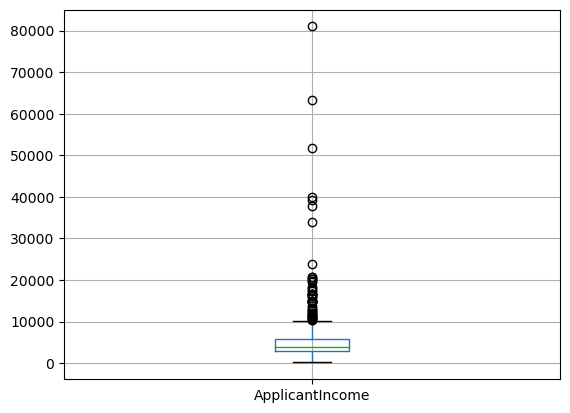

In [37]:
df.boxplot(column="ApplicantIncome")

<AxesSubplot:>

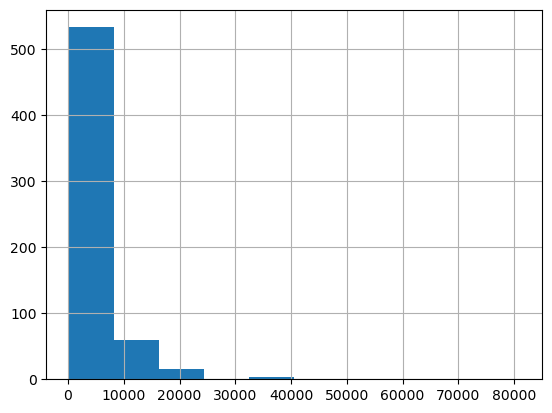

In [38]:
df['ApplicantIncome'].hist(bins=10)

<AxesSubplot:>

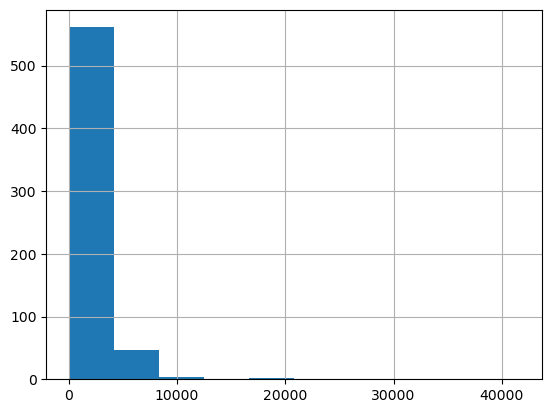

In [39]:
df["CoapplicantIncome"].hist(bins=10)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

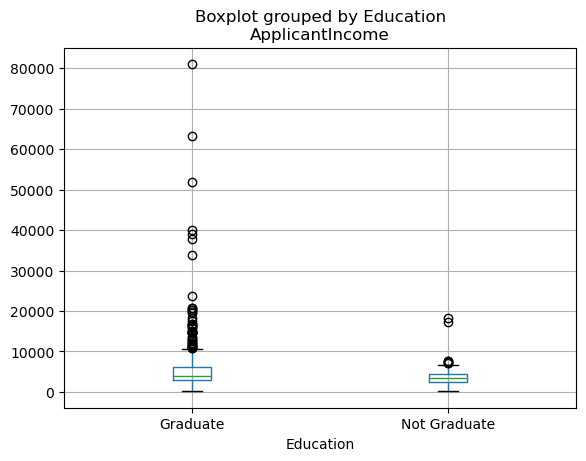

In [42]:
df.boxplot(column="ApplicantIncome",by="Education")

<AxesSubplot:>

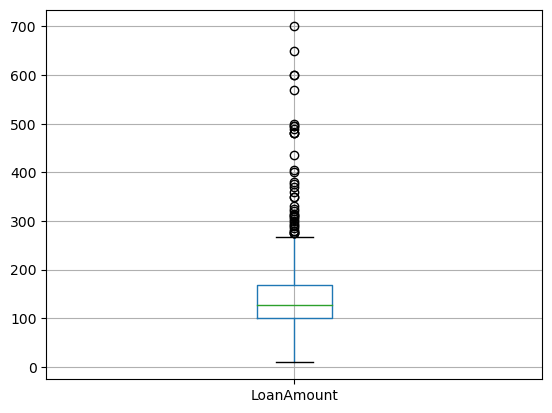

In [43]:
df.boxplot(column='LoanAmount')

<AxesSubplot:>

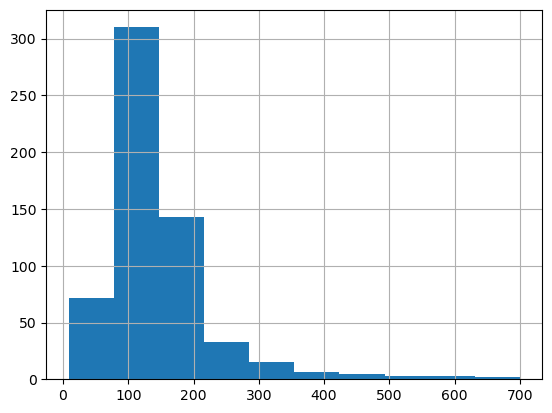

In [44]:
df['LoanAmount'].hist(bins=10)

In [45]:
#Normalizing the data
df['LoanAmount_log'] = np.log(df['LoanAmount'])

<AxesSubplot:>

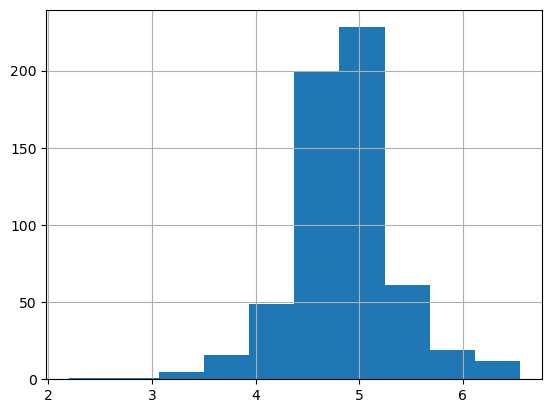

In [47]:
df['LoanAmount_log'].hist(bins=10)

In [48]:
df['Gender'].fillna(df['Gender'].mode(),inplace=True)

In [49]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [59]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [60]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [61]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [62]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [63]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [64]:
df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean(),inplace=True)

In [65]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [66]:
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [67]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [71]:
df['Total_Income'] = df['ApplicantIncome']+df['CoapplicantIncome']
df['Total_Income_log'] = np.log(df['Total_Income'])

In [72]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
582,LP002894,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,Y,3.583519,3166.0,8.060224
483,LP002541,Male,Yes,0,Graduate,No,10833,0.0,234.0,360.0,1.0,Semiurban,Y,5.455321,10833.0,9.290352
359,LP002160,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban,Y,5.298317,8334.0,9.028099
586,LP002916,Male,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,Y,4.644391,3819.0,8.247744
427,LP002368,Male,Yes,2,Graduate,No,5935,0.0,133.0,360.0,1.0,Semiurban,Y,4.890349,5935.0,8.688622


<AxesSubplot:>

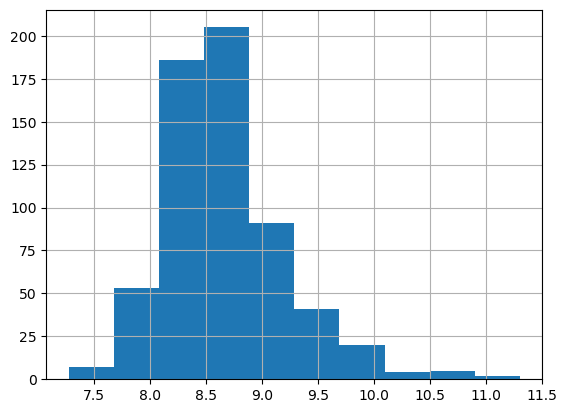

In [73]:
df['Total_Income_log'].hist(bins=10)

In [76]:
X=df.iloc[:,np.r_[1:5,9:11,13:15]].values
Y=df.iloc[:,12].values

In [78]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,Male,No,0,Graduate,360.0,1.0,4.857444,5849.0
1,Male,Yes,1,Graduate,360.0,1.0,4.85203,6091.0
2,Male,Yes,0,Graduate,360.0,1.0,4.189655,3000.0
3,Male,Yes,0,Not Graduate,360.0,1.0,4.787492,4941.0
4,Male,No,0,Graduate,360.0,1.0,4.94876,6000.0
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,360.0,1.0,4.26268,2900.0
610,Male,Yes,3+,Graduate,180.0,1.0,3.688879,4106.0
611,Male,Yes,1,Graduate,360.0,1.0,5.533389,8312.0
612,Male,Yes,2,Graduate,360.0,1.0,5.231109,7583.0


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [82]:
X_train.shape

(411, 8)

In [102]:
Y_train.shape

(411,)

In [88]:
#label Encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [89]:
for i in range(0,5):
    X_train[:,i] = encoder.fit_transform(X_train[:,i])

In [90]:
X_train[:,7]=encoder.fit_transform(X_train[:,7])

In [92]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7
0,1,1,0,1,9,1.0,4.812184,283
1,1,1,2,1,5,1.0,4.727388,67
2,0,0,0,0,9,1.0,4.430817,22
3,1,1,1,0,7,0.0,5.023881,290
4,1,1,2,0,9,1.0,5.616771,362
...,...,...,...,...,...,...,...,...
406,1,1,2,1,9,1.0,4.574711,76
407,1,1,2,0,9,1.0,5.4161,344
408,0,0,0,0,9,1.0,3.401197,39
409,0,1,0,0,6,1.0,4.857444,319


In [97]:
for i in range(0,5):
    X_test[:,i] = encoder.fit_transform(X_test[:,i])

In [98]:
X_test[:,7]=encoder.fit_transform(X_test[:,7])

In [99]:
X_test

array([[1, 1, 0, ..., 1.0, 5.429345628954441, 168],
       [1, 1, 0, ..., 0.8421985815602837, 4.867534450455582, 55],
       [1, 1, 2, ..., 1.0, 5.062595033026967, 110],
       ...,
       [0, 0, 0, ..., 0.0, 4.890349128221754, 64],
       [0, 1, 1, ..., 1.0, 4.653960350157523, 51],
       [1, 1, 2, ..., 0.8421985815602837, 4.0943445622221, 23]],
      dtype=object)

In [100]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7
0,1,1,0,0,6,1.0,5.429346,168
1,1,1,0,0,6,0.842199,4.867534,55
2,1,1,2,0,6,1.0,5.062595,110
3,0,0,0,0,6,1.0,4.26268,12
4,1,0,0,0,6,1.0,4.248495,8
...,...,...,...,...,...,...,...,...
198,1,0,1,1,6,0.0,5.062595,133
199,1,1,1,0,6,1.0,5.135798,116
200,0,0,0,0,6,0.0,4.890349,64
201,0,1,1,0,1,1.0,4.65396,51


In [101]:
X_test.shape

(203, 8)

In [93]:
Y_train = encoder.fit_transform(Y_train)

In [94]:
Y_train

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [95]:
pd.DataFrame(Y_train)

,0
0,1
1,1
2,1
3,0
4,1
...,...
406,1
407,1
408,1
409,1


In [103]:
Y_test = encoder.fit_transform(Y_test)

In [104]:
Y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1])

In [107]:
pd.DataFrame(Y_test)

,0
0,1
1,1
2,1
3,1
4,1
...,...
198,0
199,0
200,0
201,1


In [108]:
# Scaling The values
from sklearn.preprocessing import StandardScaler

In [109]:
scaler = StandardScaler()

In [110]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
clf=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [112]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [113]:
y_pred = clf.predict(X_test)

In [114]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1])

In [115]:
from sklearn.metrics import accuracy_score,r2_score
accuracy_score(Y_test,y_pred)

0.7389162561576355

In [116]:
r2_score(Y_test,y_pred)

-0.14069126378286656

In [117]:
from sklearn.naive_bayes import GaussianNB

In [118]:
GNB = GaussianNB()

In [120]:
GNB.fit(X_train,Y_train)

GaussianNB()

In [122]:
y_pred2 = GNB.predict(X_test)

In [123]:
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1])

In [124]:
accuracy_score(Y_test,y_pred2)

0.7783251231527094

In [125]:
r2_score(Y_test,y_pred2)

0.031488549618320816

In [128]:
testdata = pd.read_csv(r"C:\Users\USER\Downloads\loan-test.csv")
testdata.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
266,LP002442,Female,Yes,1,Not Graduate,No,3835,1400,112.0,480.0,0.0,Urban
237,LP002325,Male,Yes,2,Not Graduate,No,6166,13983,102.0,360.0,1.0,Rural
147,LP001817,Male,No,0,Not Graduate,Yes,8703,0,199.0,360.0,0.0,Rural
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
81,LP001428,Male,Yes,3+,Graduate,No,72529,0,360.0,360.0,1.0,Urban


In [129]:
 testdata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [130]:
 testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [131]:
 testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [161]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0],inplace=True)
testdata['LoanAmount'].fillna(testdata['LoanAmount'].mode()[0],inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0],inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0],inplace=True)

In [162]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       5
dtype: int64

<AxesSubplot:>

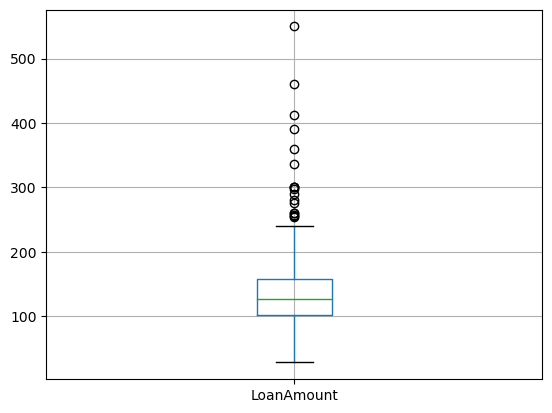

In [165]:
testdata.boxplot(column='LoanAmount')

In [166]:
testdata.LoanAmount = testdata.LoanAmount.fillna(testdata.LoanAmount.mean())

In [167]:
testdata['LoanAmount_log'] = np.log(testdata['LoanAmount'])

In [171]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

<AxesSubplot:>

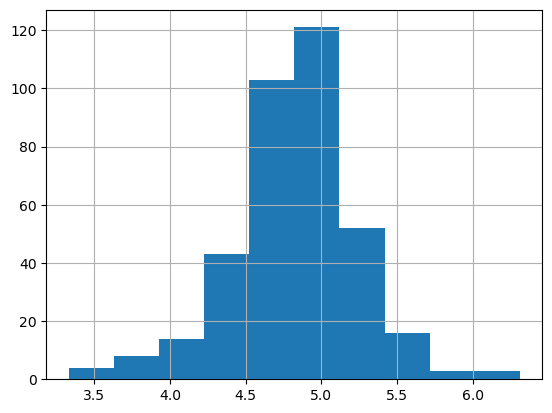

In [168]:
testdata['LoanAmount_log'].hist(bins=10)

<AxesSubplot:>

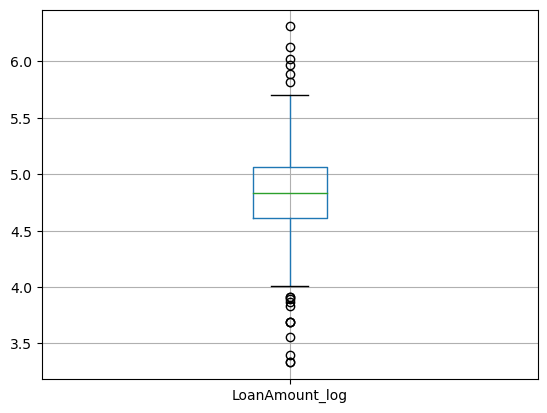

In [170]:
testdata.boxplot(column='LoanAmount_log')

In [172]:
testdata['Total_Income'] = testdata['ApplicantIncome']+testdata['CoapplicantIncome']
testdata['Total_Income_log'] = np.log(testdata['Total_Income'])

<AxesSubplot:>

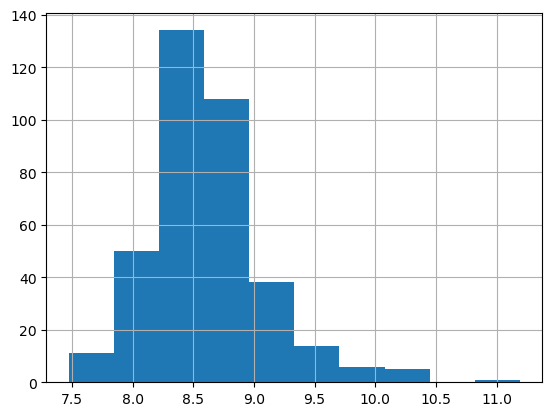

In [173]:
testdata['Total_Income_log'].hist(bins=10)

In [174]:
test=testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [175]:
for i in range(0,5):
    test[:,i] = encoder.fit_transform(test[:,i])

In [176]:
test[:,7] = encoder.fit_transform(test[:,7])

In [177]:
test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [178]:
test = scaler.fit_transform(test)

In [179]:
y_pred2 = GNB.predict(test) # Gaussian Naive Bayes

In [180]:
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [182]:
y_pred = clf.predict(test) # DecisionTreeCalssifier

In [183]:
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,

In [185]:
from sklearn.ensemble import RandomForestClassifier

In [186]:
clf2 = RandomForestClassifier(n_estimators = 100)